# Wild dog analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.dpi'] = 150

## Functions to extract extinction times and rates from data

In [2]:
def get_extinction(dat, parameters=['disperser-meeting-rate']):
    extinction_times = dat.groupby(['[run number]'] + parameters).max()['[step]'].reset_index()
    extinction_times['Extinct before 100 years'] = (extinction_times['[step]'] < 100)
    return(extinction_times)

def get_extinction_rates_from_times(extinction_times, parameters=['disperser-meeting-rate']):
    extinction_rates = extinction_times.groupby(parameters).mean().reset_index()
    extinction_rates = extinction_rates.rename(columns={'Extinct before 100 years': 'Probability of mortality'})
    return(extinction_rates)

def plot_extinction(dat):
    extinction_times = get_extinction(dat)
    sns.barplot(data=extinction_times, y='Extinct before 100 years', x='disperser-meeting-rate', color='gray')
    plt.ylim(0, 1)

## Plot the fractions that are extinct

We'll demo the difference between 100 and 400 repetitions.

Expect errorbars to be 95% confidence interval, i.e. 0.10
Expect errorbars to be 95% confidence interval, i.e. 0.05


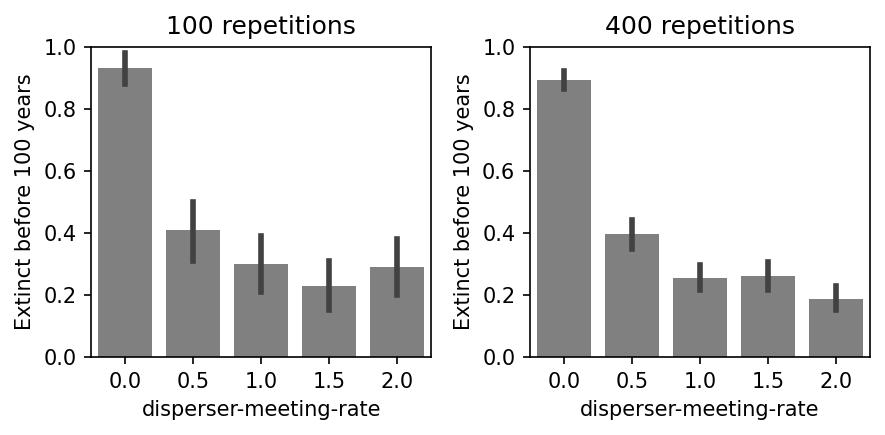

In [3]:
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
dat100 = pd.read_csv("african-wild-dogs Disperser group meeting rate-table-100.csv", header=6)
# dat.head()
plot_extinction(dat100)
plt.title("100 repetitions")
print("Expect errorbars to be 95%% confidence interval, i.e. %0.2f"%(np.sqrt(0.5* (1 - 0.5)/100)*2))

plt.subplot(1, 2, 2)
dat400 = pd.read_csv("african-wild-dogs Disperser group meeting rate-table-400.csv", header=6)
# dat.head()
plot_extinction(dat400)
plt.title("400 repetitions")
print("Expect errorbars to be 95%% confidence interval, i.e. %0.2f"%(np.sqrt(0.5* (1 - 0.5)/400)*2))
plt.tight_layout()
plt.savefig('extinction-disperser-meeting-rate.png')


## Sensitivity analysis

First load the data.

In [4]:
datSA = pd.read_csv("african-wild-dogs Disperser group meeting rate SA-table.csv", header=6)
extinction_times_SA = get_extinction(datSA)
extinction_rates_SA = get_extinction_rates_from_times(extinction_times_SA)
extinction_rates_SA

,disperser-meeting-rate,[run number],[step],Probability of mortality
0,0.50,50.5,84.44,0.43
1,0.55,150.5,85.69,0.38
2,0.60,250.5,87.20,0.34
3,0.65,350.5,86.74,0.35
4,0.70,450.5,90.77,0.28
5,0.75,550.5,89.87,0.30
6,0.80,650.5,89.53,0.32
7,0.85,750.5,89.94,0.33
8,0.90,850.5,90.17,0.27
9,0.95,950.5,91.85,0.28


In [5]:
extinct_disperser = extinction_times_SA.groupby(['disperser-meeting-rate'], as_index=False).mean()
# extinct_disperser['disperser-meeting-rate']

<Axes: xlabel='disperser-meeting-rate', ylabel='Probability of mortality'>

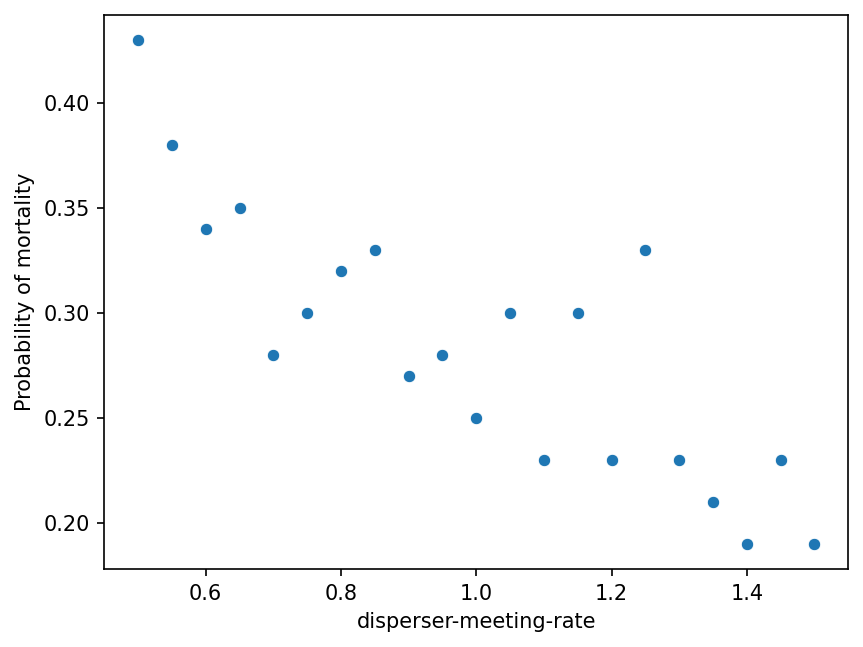

In [6]:
sns.scatterplot(data=extinction_rates_SA, x='disperser-meeting-rate', y='Probability of mortality')

### Fit a linear model

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.scotland.load()

In [8]:
fit_data = extinction_rates_SA.copy()[['Probability of mortality', 'disperser-meeting-rate']].dropna()
exog_data = sm.add_constant(fit_data.drop('Probability of mortality', axis=1))


In [9]:
model = sm.OLS(fit_data['Probability of mortality'],
                         exog_data)
results = model.fit()
beta0 = results.params['const']
beta1 = results.params['disperser-meeting-rate']

print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Probability of mortality   R-squared:                       0.700
Model:                                  OLS   Adj. R-squared:                  0.685
Method:                       Least Squares   F-statistic:                     44.44
Date:                      Thu, 19 Oct 2023   Prob (F-statistic):           2.25e-06
Time:                              12:47:59   Log-Likelihood:                 41.282
No. Observations:                        21   AIC:                            -78.56
Df Residuals:                            19   BIC:                            -76.47
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

The coefficient of the disperser-meeting-rate shows that for every increase in 1 of the disperer-meeting-rate around the value of 1, we should expect the fraction extinct by 100 years to decrease by -0.17. 

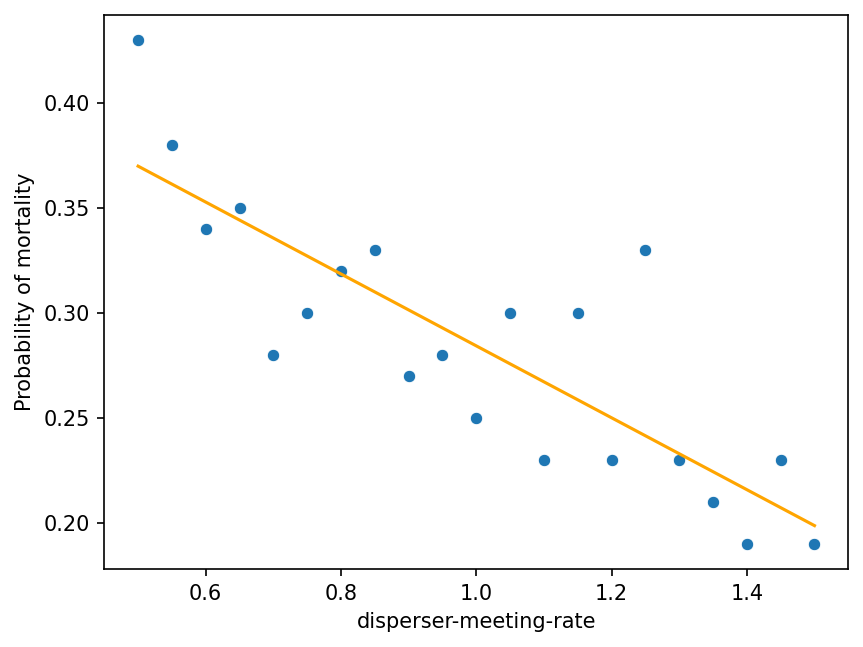

In [10]:
sns.scatterplot(data=extinction_rates_SA, x='disperser-meeting-rate', y='Probability of mortality')
plt.plot(extinction_rates_SA['disperser-meeting-rate'], beta0 + beta1*extinction_rates_SA['disperser-meeting-rate'], color='orange')

# Two parameters

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

dat_2par = pd.read_csv("african-wild-dogs Disperser group meeting rate (2 param)-table.csv", header=6)
dat_2par.head()

,[run number],disperser-meeting-rate,initial-num-packs,[step],count turtles
0,3,0.0,2,0,16
1,7,0.0,2,0,16
2,8,0.0,2,0,8
3,2,0.0,2,0,12
4,6,0.0,2,0,13


In [12]:
extinction_times_2par = get_extinction(dat_2par, parameters=['disperser-meeting-rate', 'initial-num-packs'])
extinction_rates_2par = get_extinction_rates_from_times(extinction_times_2par, parameters=['disperser-meeting-rate', 'initial-num-packs'])
extinction_rates_2par.head()

,disperser-meeting-rate,initial-num-packs,[run number],[step],Probability of mortality
0,0.0,2,50.5,46.19,0.90
1,0.0,4,150.5,50.05,0.87
2,0.0,6,250.5,54.17,0.82
3,0.0,8,350.5,52.98,0.86
4,0.0,10,450.5,47.55,0.91


In [13]:
X = extinction_rates_2par['disperser-meeting-rate']
Y = extinction_rates_2par['initial-num-packs']
Z = extinction_rates_2par['Probability of mortality']

In [14]:
# Reshaping required to keep matplolib happy
X = np.array(X).reshape((6, 10))
Y = np.array(Y).reshape((6, 10))
Z = np.array(Z).reshape((6, 10))
X

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6],
       [2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ]])

Text(0, 0.5, 'initial-num-packs')

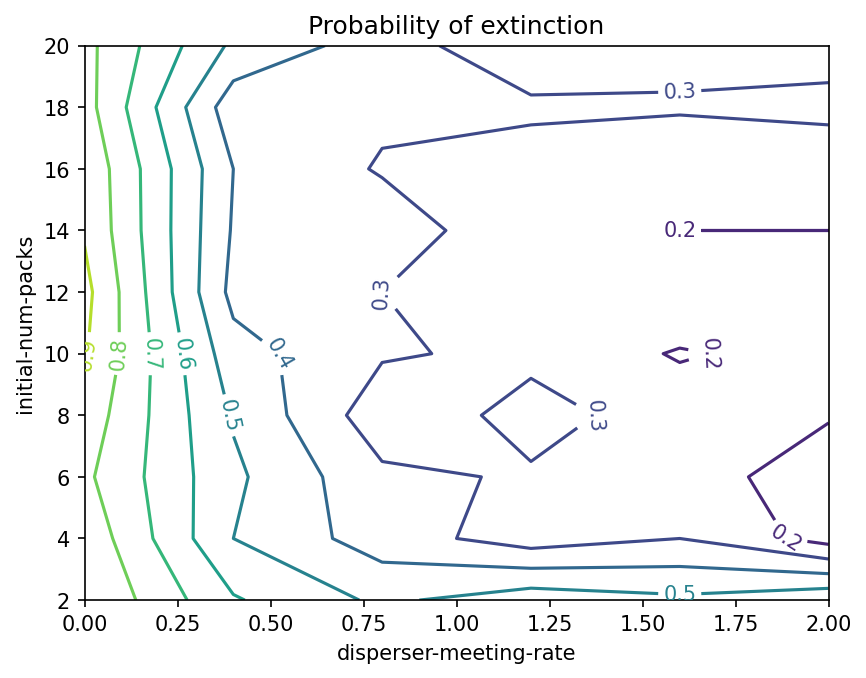

In [15]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Probability of extinction')
ax.set_xlabel('disperser-meeting-rate')
ax.set_ylabel('initial-num-packs')